# 台灣同性婚姻論述中的「同志」

## 前情提要
在上一篇的文章中，我發現下福盟和伴侶盟兩個語料中，「同志」和「同性戀」兩個詞使用頻率有明顯的不同情形，在下福盟中，兩個詞出現的頻率幾乎相同，「同性戀」出現1393次，「同志」出現1305次；而在伴侶盟的語料中，「同性戀」出現569次，而「同志」則出現153次，前者出現的次數是後者出現的 3.7 倍。（見下圖圖表）

![title](同性戀和同志頻率分布2.svg)

## 所以...
我很好奇到底這兩個詞在兩個語料中是如何使用的？以及為什麼在伴侶盟這兩個詞出現的次數差距很大，但在下福盟語料裡卻次數差不多。我將利用 concordance 工具，來看語料中這兩個詞出現的脈絡究竟是什麼，觀察前面接什麼樣的動詞，後面接什麼樣的名詞...等。透過觀察一個詞出現的脈絡，也許可以看出一些端倪。

先按照例行公事，匯入語料，並轉換成`nltk.text.Text()`物件：

In [53]:
import nltk
import re
import jieba
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams['figure.figsize'] = [10, 5]
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/msj.ttf',size=14)
sns.set(font=myfont.get_name())

%matplotlib inline

pd.set_option('display.max_rows', 2000)

LGBTFAMILY_PATH = "line_sentence_lgbtfamily.txt"
LOVEFAMILY_PATH = "line_sentence_lovefamily.txt"

lgbtfamily_raw_text = ""
lovefamily_raw_text = ""

with open(LGBTFAMILY_PATH) as f:
    lgbtfamily_raw_text = f.read()

with open(LOVEFAMILY_PATH) as f:
    lovefamily_raw_text = f.read()
    
# 將文本拆成 list of words
lgbtfamily_word_list = [word for sentence in lgbtfamily_raw_text.split('\n') for word in sentence.split(' ')]
lovefamily_word_list = [word for sentence in lovefamily_raw_text.split('\n') for word in sentence.split(' ')]

# 轉換好後，丟入 nltk.text.Text
lovefamily_text = nltk.text.Text(lovefamily_word_list)
lgbtfamily_text = nltk.text.Text(lgbtfamily_word_list)

`nltk` 套件中有兩個關於 concordance 工具的方法：`nltk.text.Text.concordance()`和`nltk.text.Text.concordance_list()`，前者可以直接以字串印出美美的 concordance，後者則是會把結果回傳成`list`，可以用來進行其他轉換。

下面我將利用 `nltk.text.Text.concordance_list()` 方法，再把結果轉成`pandas`的`DataFrame`，方便呈現出來。讓我們先看一下 `nltk.text.Text.concordance_list` 方法的文件：

In [54]:
help(nltk.text.Text.concordance_list)

Help on function concordance_list in module nltk.text:

concordance_list(self, word, width=79, lines=25)
    Generate a concordance for ``word`` with the specified context window.
    Word matching is not case-sensitive.
    
    :param word: The target word
    :type word: str
    :param width: The width of each line, in characters (default=80)
    :type width: int
    :param lines: The number of lines to display (default=25)
    :type lines: int
    
    :seealso: ``ConcordanceIndex``



## 下福盟中的「同志」

In [55]:
lovefamily_tongzhi_c = lovefamily_text.concordance_list('同志', width=50, lines=10000)

lovefamily_tongzhi_df = pd.DataFrame({
    "left_context": [' '.join(line.left) for line in lovefamily_tongzhi_c],
    "query": '同志',
    "right_context": [' '.join(line.right) for line in lovefamily_tongzhi_c],
})

lovefamily_tongzhi_df

,left_context,query,right_context
0,憲法 支持 的 是 台灣 現有 一男一女 一夫一妻 的 婚姻制度 同性婚姻 理由,同志,族群 因 社會 歧視 汙名 而 不易 現身 但 各國 研究
1,因 社會 歧視 汙名 而 不易 現身 但 各國 研究 均 顯示,同志,家庭 佔 人口 一定 比例 卻 無法 享有 身分 關係 的
2,擁抱 干擾 教會 聖誕 活動 根據 在 網路上 發起 的 真愛 聖誕,同志,路過 教會 公民 行動 中 提到 我 想到 了 一個 活動
3,提到 我 想到 了 一個 活動 計劃 就是 號召 全 臺灣 的,同志,與 直 同志 朋友 在 聖誕節 期月 日間 攻佔 各大 教會
4,了 一個 活動 計劃 就是 號召 全 臺灣 的 同志 與 直,同志,朋友 在 聖誕節 期月 日間 攻佔 各大 教會 的 晚會 並且
5,提供 給 司法 檢調 單位 作為 呈堂 證供 的 依據 真愛 聖誕,同志,路過 教會 公民 行動 時間 年月日 日 地點 臺灣 各地 教會
6,的 依據 來 參加 聖誕 晚會 嗎 聖誕夜 本來 就是 大型 晚會,同志,朋友 去 了 幾間 教會 後 發現 教會 也 都 很
7,接納 甚至 歡迎 送 小 禮物 很多 教會 也 都 表明 歡迎,同志,朋友 甚至 接待 他們 進 會場 握手 歡迎 他們 但 同運
8,的 人 這是 預謀 的 嗎 我們 相信 同運 團體 所有 的,同志,朋友 但 同運 團體 這樣 做 只會 製造 更 多 的
9,對立 及 衝突 難怪 教宗 會 說 同運 團體 不好 但 很多,同志,朋友 被 他們 給 污名 化 了 提供 教宗 影片 難道


## 伴侶盟中的「同志」

In [56]:
lgbtfamily_tongzhi_c = lgbtfamily_text.concordance_list('同志', width=50, lines=10000)

lgbtfamily_tongzhi_df = pd.DataFrame({
    "left_context": [' '.join(line.left) for line in lgbtfamily_tongzhi_c],
    "query": '同志',
    "right_context": [' '.join(line.right) for line in lgbtfamily_tongzhi_c],
})

lgbtfamily_tongzhi_df

,left_context,query,right_context
0,平等 的 關懷 陳 冠中 也 在 文末 指出 反觀 他 的,同志,朋友 在 台灣 某 銀行 當 客服 人員 他 的 主管
1,承諾 受理 此釋 憲申聲 請案 協助 被 剝奪 結婚 自由 的 台灣,同志,並 期待 大法官 能 藉此 矯正 我國 民法 對於 同志 的
2,的 台灣 同志 並 期待 大法官 能 藉此 矯正 我國 民法 對於,同志,的 制度性 歧視 彌補 長期 比來 政府 失職 與 立法 怠惰
3,權益 推動 聯盟 秘書長 簡至潔批 祁家 威為 台灣 第一位 公開 出櫃 的,同志,並於 年 就 開始 要求 政府 保障 同志 結婚 的 權益
4,第一位 公開 出櫃 的 同志 並於 年 就 開始 要求 政府 保障,同志,結婚 的 權益 年 過去 同志 權益 逐漸 擴張 選在 行憲紀念
5,年 就 開始 要求 政府 保障 同志 結婚 的 權益 年 過去,同志,權益 逐漸 擴張 選在 行憲紀念 日 前夕 提出 釋憲案 申請 別具
6,絆腳石 竟是 行政 與 立法 系統 痛批 法律 竟 如此 公開 踐踏,同志,人權 盼為 憲法 守門員 的 大法官 能夠 還給 同志 平等 的
7,如此 公開 踐踏 同志 人權 盼為 憲法 守門員 的 大法官 能夠 還給,同志,平等 的 人權 祁家 威則 表示 日前 立法院 審議 婚姻平權法 案時
8,釋憲 申請 呼籲 大法官 面對 婚姻 平權 受 侵害 的 問題 還給,同志,平等 的 婚姻 權益 捍衛 同志 的 尊嚴 新聞 原址 司法
9,平權 受 侵害 的 問題 還給 同志 平等 的 婚姻 權益 捍衛,同志,的 尊嚴 新聞 原址 司法 訴訟 祁家威 釋憲 原文 連結 蕭婷方


其實資料筆數還滿多的，有興趣的人可以先用肉眼掃過一遍，看看有沒有什麼有趣的觀察。

初步的觀察看起來，我發現在兩個語料之中，「同志」一詞在兩個語料中大致扮演兩種語法上的功能：

1. 作為一個複合名詞的前半部，像是「同志教育」、「同志朋友」、「同志大遊行」、「同志伴侶」、「同志婚姻」、「同志族群」...等

2. 作為單一出現的名詞，例如「由同志扶養的孩子」、「並不是同志想收養子女就可以」、「同志也可以平等適用」、「撕裂同志與社會的感情」、「將同志當成疾病診斷」、「表明自己己未反對同志」、「將同志塑造成社會邊緣人」...等

## 「同志」作為複合名詞的前半部

想要觀察「同志」一詞的第一種用法，或許可以透過 collcation 的方式，取出「同志」一詞以及其後一起出現的另一詞的種類與頻率：

In [57]:
def generate_bigram_freq(wordlist, keyword, order=0):
    # 生成 bigrams
    bigrams = [bigram for bigram in nltk.bigrams(wordlist) if bigram[order]== keyword]
    
    # 生成 Frequency list
    fq_list = nltk.probability.FreqDist(bigrams)
    
    #
    fq_list = [(''.join(k), v, v / len(bigrams)) for (k, v) in fq_list.items()]
    
    # 由次數大到小排序
    fq_list = sorted(fq_list, key=lambda tup: tup[1], reverse=True)
    
    return fq_list

### 下福盟
#### 下福盟語料中所有「同志」作為Bigram前半部的詞

In [58]:
lovefamily_tongzhi_bigram_freq_right_context = pd.DataFrame(generate_bigram_freq(lovefamily_word_list, '同志'), columns=['詞', '次數', '次數/總數'])
lovefamily_tongzhi_bigram_freq_right_context

,詞,次數,次數/總數
0,同志教育,189,0.144828
1,同志運動,95,0.072797
2,同志遊行,78,0.059770
3,同志的,61,0.046743
4,同志大,60,0.045977
5,同志家庭,47,0.036015
6,同志朋友,34,0.026054
7,同志圈,33,0.025287
8,同志伴侶,32,0.024521
9,同志族群,26,0.019923


#### 下福盟中「同志」作為Bigram前半部的前20名

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

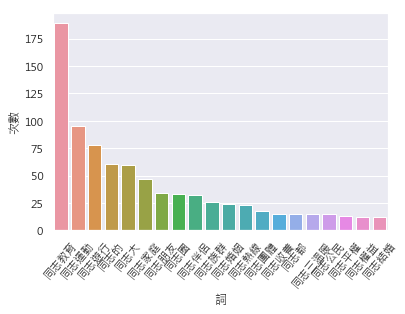

In [59]:
g = sns.barplot(x="詞", y="次數", data=lovefamily_tongzhi_bigram_freq_right_context[:20])
plt.xticks(rotation=50) 

### 伴侶盟
#### 伴侶盟語料中所有「同志」作為Bigram前半部的詞

In [60]:
lgbtfamily_tongzhi_bigram_freq_right_context = pd.DataFrame(generate_bigram_freq(lgbtfamily_word_list, '同志'), columns=['詞', '次數', '次數/總數'])
lgbtfamily_tongzhi_bigram_freq_right_context

,詞,次數,次數/總數
0,同志教育,65,0.114236
1,同志的,47,0.082601
2,同志伴侶,28,0.049209
3,同志婚姻,27,0.047452
4,同志結婚,16,0.028120
5,同志大,13,0.022847
6,同志運動,12,0.021090
7,同志權益,10,0.017575
8,同志族群,10,0.017575
9,同志團體,10,0.017575


#### 伴侶盟中「同志」作為Bigram前半部的前20名

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

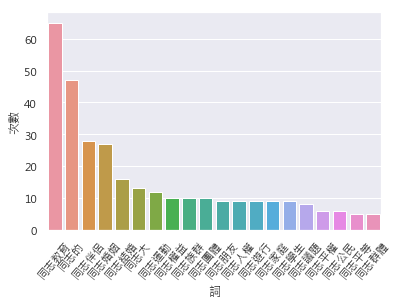

In [61]:
g = sns.barplot(x="詞", y="次數", data=lgbtfamily_tongzhi_bigram_freq_right_context[:20])
plt.xticks(rotation=50) 

### 比較一下

首先，先看兩張前20名的圖表，可以看到兩張圖表由最多到最少排列下來的趨勢有點像，前五名的比例非常高，坡度非常陡，而第五名以後的則是越來越平坦。（不知道這算不算是一種Zipf's law的展現？）

另外，兩個語料中的第一名都是「同志教育」這個詞，這顯示至少在這兩個語料中，同志教育是一個共同的議題熱點，因而之後若再繼續深入觀察兩個語料如何使用「同志教育」一詞，在比較上也具有意義。

接著可以來看看在這前20名中，有沒有什麼各自語料的亮點。在下福盟的前20名當中，我們可以看到「同志三溫暖」、「同志圈」、「同志收養」、「同志熱線」和「同志都」這個五個詞沒有出現在伴侶盟的前20名中；另外在伴侶盟的前20名當中，我們看到「同志人權」、「同志學生」、「同志平等」、「同志族群」和「同志議題」這五個詞沒有出現在下福盟的前20名中。

在這幾個亮點中我們可以看到，下福盟中的這幾以同志為首的複合詞強調的是同志出現的特定場所（三溫暖）、兒童法律議題（收養）、特定同志組織專名（同志熱線）、指涉他者群體（同志圈），還有一個是加上表達「全部所有」的副詞（同志都）。為什麼「同志三溫暖」在下福盟語料出現那麼多次，大家可以回去上方的concordance找看看這個詞如何使用。而關於「同志圈」，在現今用語中，不乏以XX圈指涉他者的稱號，例如我從PTT語料庫看到的「社運圈」、「8+9圈」、「覺青圈」、「gay圈」...等，而且常常伴隨著負面情緒。讓我們看一下「同志圈」在下福盟中的concordance:

In [62]:
lovefamily_tongzhi_df[lovefamily_tongzhi_df['right_context'].str.startswith('圈')]

,left_context,query,right_context
95,傾向 扭轉 治療 嚴重 觸法 同志 人權 守護 記者會 發言稿 年月日 另一方面,同志,圈 也 有 其他 同志 開 記者會 表達 支持性 傾向 迴轉
145,出版 對於 有 同性戀 性 傾向 的 人 我們 尊重 他 但是,同志,圈內 的 性 文化 對性 的 價值觀 卻是 令 家長 無法
161,受限 的 問題 其他 因 私人 因素 不願 踏入 婚姻關係 的 同性伴侶,同志,圈 存在 不 願意 結婚 的 毀婚 派 與 異性 伴侶
165,接納 病人 同性 好 朋友 的 協助 一樣 同時 本站 也 向,同志,圈 的 朋友 們 呼籲 拜託 大家 也 要 一併 愛
218,專家 認為 後 同 是 指 不 認同 或 不 與 主流,同志,圈 文化 連結 的 同性戀者 在 某 支持 家庭 價值 的
219,自從 郭 大衛 先生 勇敢 在 公聽會 發表 出櫃 的 言論 後,同志,圈內 各種 謾罵 排山倒海 而來 且 不斷 有人 否定 大衛 曾經
220,不斷 有人 否定 大衛 曾經 是 個 男同性戀 的 事實 這是 台灣,同志,圈 長期存在 的 陋習 一種 同性戀 霸權 下 雙重標準 文化 的
221,陋習 一種 同性戀 霸權 下 雙重標準 文化 的 概念 只要 稍微 觀察,同志,圈 的 輿論 會 發現 同志 圈 相當 強調 當事人 的
222,文化 的 概念 只要 稍微 觀察 同志 圈 的 輿論 會 發現,同志,圈 相當 強調 當事人 的 自我 認同 對於 積極主動 宣稱 自己
224,他 主觀 認定 自己 是 同性戀者 他 的 自我 認同 仍 受到,同志,圈 的 肯定 及 讚美 然而 當有 同性戀者 意識 到 同性戀


另外，「同志都」的出現也是一個有趣的現象，我先在下方給出「同志都」在下福盟中出現的concordance：

In [63]:
lovefamily_tongzhi_df[lovefamily_tongzhi_df['right_context'].str.startswith('都')]

,left_context,query,right_context
18,主張 爭取 同志 婚姻 的 人 非常 自私 並 不是 每 一個,同志,都 想要 結婚 婚姻 只是 個 枷鎖 不該 讓 同志 被
84,兩 裸男 口交 畫面 柯 教授 期待 來 聽 她 演講 的,同志,都 變成 約 砲 達人 成大 柯乃熒 教授 當 過 網路
286,不要 扭曲 事實 互相攻擊 就 像 多少 的 愛滋 感染者 多少 的,同志,都 曾經 被 人 污名 而 深受 傷害 我們 要 懂得
323,小編 反對 將 愛滋 與 同志 劃上 等 號並 不是 每 一個,同志,都 感染 愛滋 也 不是 只要 你 具備 同志 身分 就
337,被 包裝 成 娛樂性 用藥 等 性解放 文化 雖然 並非 每 一個,同志,都 捲入 這樣 的 文化 但是 同志 圈 的 意見 領袖
551,的 郭 大衛 在 節目 中 指出 以 他 個人 切身經驗 說,同志,都 是 天生 的 太 武斷 在 性 探索 階段 是
557,不是 反性平 教育 後 同 大衛 指出 以 他 個人 切身經驗 說,同志,都 是 天生 的 太 武斷 在 性 探索 階段 是
575,只是 拿 稱謂 作為 博取 大眾 同情心 的 幌子 六 所有 的,同志,都 不能 簽 手術 同意書 答 你 確定 同性伴侶 真的 毫無
651,也 有 類似 的 帝國 式 侵略 法國 一些 反對 同性婚姻 的,同志,都 認為 同運 意識 是 美國 製造 的 利用 政權 強壓
1070,及 同居 關係 應該 同時 推動 讓 願意 守貞 不願易 守貞 的,同志,都 能 按照 每個 人 生命 不同 的 需要 做 一個


純粹從語意上來看，「都」這個副詞的一個意思是「全部」，像是「我功課都做完了」和「水果都壞掉了」，在這些句子中並不具有特定的情緒意義。但是當我們在針對一個群體進行論述時，由於我們不可能窮盡這個群體當中的所有個體，群體中的個體也不可能是同質的（更不要說這個群體是否只是一種建構），因此當發現語料中出現「某個群體」加上「都」的時候，便需要特別小心。

在下福盟語料當中幾個含有「同志都」的句子中，我們看到一個很常出現的模式：「不是每一個同志都...」，這樣的用字遣詞是否間接地蘊含著，對下福盟而言，他們的反方（也就是伴侶盟）認為同志們都是如何如何，因此下福盟才會特別以全稱命題的否定形式來做論述呢？

## 小結

這篇我只處理「同志」這一個詞在兩個語料中的現象，而且這篇僅止於「同志」作為複合名詞的前半部時的情況。關於「同志」做單一的名詞出現（可能是動作的主語或受語）的現象比較複雜，因此可能會在下一篇進行。寫這一篇的時候我看到了語料本身的複雜度，單單抽取出「同志」之後緊接的詞作分析，已經是一個簡化到不行的方法，因此只能是過程，不能是目的，我必須不斷指涉回去該複合名詞出現的脈絡，才不會只看到自己想看的，而且也還會有新的更大層次的發現（像是「並不是每個同志都」這樣的construction）。

關於「同性戀」一詞的觀察，也要等到後面幾篇才有篇幅可以討論了，等討論完了之後才有辦法對我原本最好奇的問題，也就是「同志」與「同性戀」這兩個近義詞在兩方語料的表現，進行較完整的比較。